# **Data Analysis for Titanic Data**

![Image](http://www.theatrebloom.com/wp-content/uploads/2018/01/titanic-banner.jpg)

[Image Credit](http://www.theatrebloom.com/2018/01/heritage-players-ship-dreams-titanics-cast-musicians-share-dreams-spencer-kate-nelson-daniel-plante/) <br>

In this notebook, the data of **Titanic - Machine Learning from Disaster** is analyzed and prepared for developing prediction models. <br>
The data can be downloaded from: <br>
https://www.kaggle.com/competitions/titanic

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
import os
import ppscore as pps

In [2]:
os.chdir("../etl")
data_path = "../data/raw/"

## **1. First Glance at Data:**
In this section, we take a quick look at data, data types, etc.

**1.1 Quick look at data:**

In [3]:
train_raw = pd.read_csv(data_path + "train.csv")
train_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_raw = pd.read_csv(data_path + "test.csv")
test_raw.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**1.2 Type of the features:**

In [5]:
print('#'*20,'train set','#'*20)
print(train_raw.info())
print('#'*20,'test set','#'*20)
print(test_raw.info())

#################### train set ####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
#################### test set ####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Coun

**1.3 Number of missing data points:**

In [6]:
train_raw.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_raw.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**1.4 General Statistics:**

In [8]:
train_raw.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test_raw.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
train_raw.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [11]:
test_raw.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


## **2. Preparing Data:**
In this section, we apply some data preparation steps.

**2.1 Checking the values of "Name" and "PassengerId":** 

The values of "Name" and "PassengerId" are unique for each passenger. So, it might be better to drop these features.

In [12]:
train_raw['Name'].value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

In [13]:
train_raw['PassengerId'].value_counts()

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

**2.2 Checking the values of "Ticket":**

We check the values of the feature "Ticket" to see how unique they are. This feature seems to be useless for developing the models.

In [14]:
train_raw['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

As we can see, there are 681 different ticket numbers for 891 passengers. It is probable that all members of a family have the same ticket number. So, it apparently dosen't contain valuable information we can use, other than we conclude that if a member of a family survived, the other members probably survived, too.

On the other hand, the feature "Cabin" has 687 missing values (out of 891). Moreover, it may present unique values. Lets check it.

In [15]:
train_raw['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

So, it contains 147 unique values (out of 204 recorded values). So, it doesn't look like necessary to keep this feature.

**2.3 Binarizing 'Sex':**

The values of 'Sex' in its current form cannot be used for model training. So, lets change 'Sex' to binary values.

In [16]:
train_raw['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [17]:
# Since we are going to transform data, we need to copy the data first to avoid changing the original data
train_df = train_raw.copy()
test_df = test_raw.copy()

train_df.loc[train_df['Sex']=='male', 'Sex'] = 0
train_df.loc[train_df['Sex']=='female', 'Sex'] = 1

test_df.loc[test_df['Sex']=='male', 'Sex'] = 0
test_df.loc[test_df['Sex']=='female', 'Sex'] = 1

# change the type of column 'Sex' to int
train_df['Sex'] = train_df['Sex'].astype('int')
test_df['Sex'] = test_df['Sex'].astype('int')

train_df['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

**2.4 Making a new feature 'FamilySize':**

We can make a new feature representing the family size by integrating 'SibSp' and 'Parch'. In this case, we may decide to drop 'SibSp' and 'Parch' from the datset.

In [18]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch']
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch']

train_df['FamilySize'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: FamilySize, dtype: int64

**2.5 Applying one-hot encoding to 'Pclass' and 'Embarked':**

'Pclass' has ordinal integer values which can be 1, 2, or 3. 'Embarked' has a categorical values which can be S, C, or Q. If we want to use 'Embarked', we have to transform this feature. So, a good practice is to apply one-hot encoding to 'Pclass' and 'Embarked'.

In [19]:
print(f"The values of Pcalss can be {train_df['Pclass'].unique()}.")
print(f"The values of Embarked can be {train_df['Embarked'].unique()}.")

The values of Pcalss can be [3 1 2].
The values of Embarked can be ['S' 'C' 'Q' nan].


In [20]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(train_df[['Pclass']])
Pclass_train_df = pd.DataFrame(enc.transform(train_df[['Pclass']]).toarray())
Pclass_test_df = pd.DataFrame(enc.transform(test_df[['Pclass']]).toarray())

# adding the new features to the datasets
train_df[['Pc1','Pc2','Pc3']] = Pclass_train_df.copy()
test_df[['Pc1','Pc2','Pc3']] = Pclass_test_df.copy()

Now, lets apply one hot encoding to the feature 'Embarked'. This feature has 2 missing values in the train set.

Considering (1) the missing values in "Embarked", (2) the fact that to use "KNNImputer", we have to convert the categorical values, and (3) the fact that to use "OneHotEncoder" we should not have np.nan (missing) values:

We implement the procedure explained in https://stackoverflow.com/questions/62868129/cyclical-loop-between-onehotencoder-and-knnimpute-in-scikit-learn:

* Fill categorical missings with pandas or SimpleImputer with the string "missing".
* Use OneHotEncoder then.
* Use the one-hot encoder's get_feature_names to identify the columns corresponding to each original feature, and in particular the "missing" indicator.
* For each row and each original categorical feature, when the 1 is in the "missing" column, replace the 0's with np.nan; then delete the missing indicator column.
* Now everything should be set up to run KNNImputer.
* Finally, if desired, postprocess the imputed categorical-encoding columns. (Simply rounding might get you an all-zeros row for a categorical feature, but I don't think with KNNImputer you could get more than one 1 in a row. You could argmax instead to get back exactly one 1.)

First, we replace the mising values of 'Embarked' with 'Missing' using 'SimpleImputer'.

In [21]:
sim_imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Missing')
train_df['Embarked'] = sim_imp.fit_transform(train_df[['Embarked']])
train_df[['Embarked']].isna().sum()

Embarked    0
dtype: int64

Then, we apply 'OneHotEncoder' to the dataset.

In [22]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(train_df[['Embarked']])
embarked_train_df = pd.DataFrame(enc.transform(train_df[['Embarked']]).toarray())
embarked_test_df = pd.DataFrame(enc.transform(test_df[['Embarked']]).toarray())

embarked_train_df.value_counts()

0    1    2    3  
0.0  0.0  0.0  1.0    644
1.0  0.0  0.0  0.0    168
0.0  0.0  1.0  0.0     77
     1.0  0.0  0.0      2
dtype: int64

So, the second column (embarked_train_df[1]) represents the 'Missing' values. For each row where this variable is 1, the other varaibels of 'embarked_df' have to be np.nan. Note that only the train set has missing values of 'Embarked'.

In [23]:
embarked_train_df.isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [24]:
# first applying it to the train set
train_df.loc[embarked_train_df[1] == 1, 'Embarked'] = np.nan
train_df.isna().sum()['Embarked']

2

In [25]:
embarked_train_df[embarked_train_df[1] == 1] = np.nan
embarked_train_df.isna().sum()

0    2
1    2
2    2
3    2
dtype: int64

Now, we can integrate the other columns of 'embarked_train_df' (except the second column which is representing the missing values) into 'train_df'.

In [26]:
train_df[['em1','em2','em3']] = embarked_train_df[[0,2,3]].copy()
test_df[['em1','em2','em3']] = embarked_test_df[[0,2,3]].copy()

Now, take a look at the missing values:

In [27]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
Pc1              0
Pc2              0
Pc3              0
em1              2
em2              2
em3              2
dtype: int64

In [28]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
FamilySize       0
Pc1              0
Pc2              0
Pc3              0
em1              0
em2              0
em3              0
dtype: int64

**2.6 Dropping 'Cabin':**

As we stated before, we may not need the feature 'Cabin'. Considering the large number of missing values for this feature, we drop it now to make the next step (imputing the missing values) simpler.

In [29]:
train_df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)

**2.7 Data Imputation:**

After droping 'Cabin', the main focus of data imputation is on 'Age'. For imputing values of 'Age', we can simply use an imputer such as 'KNNImputer' to the datasets. However, there could be another approach by benefiting the recorded title of passengers in 'Name'.

The number of missing values for other features is not so large. Therefore, the imputation method for them may not have considerable effect on model training.

Here, we apply both aforementioned approaches and compare their results.

In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  FamilySize   891 non-null    int64  
 12  Pc1          891 non-null    float64
 13  Pc2          891 non-null    float64
 14  Pc3          891 non-null    float64
 15  em1          889 non-null    float64
 16  em2          889 non-null    float64
 17  em3          889 non-null    float64
dtypes: float64(8), int32(1), int64(6), object(3)
memor

In [31]:
# Using KNNImputer to impute the missing values: It should not involve the target variable and columns of type object
col_exc_train = ['PassengerId','Survived','Name','Ticket','Embarked']
col_exc_test = ['PassengerId','Name','Ticket','Embarked']

A = train_df.drop(columns=col_exc_train)
B = test_df.drop(columns=col_exc_test)

imputer = KNNImputer(n_neighbors=10)
imputer.fit(A)
train_imp = pd.DataFrame(imputer.transform(A), columns=A.columns)
test_imp = pd.DataFrame(imputer.transform(B), columns=B.columns)

# adding 'Survived' to the train set
train_imp = train_imp.join(train_df[col_exc_train])
test_imp = test_imp.join(test_df[col_exc_test])

Lets take a look at emputed 'em1', 'em2', and 'em3'. The imputed values are not necessarily binary. So, we need to binarize them.
Since the feature 'Embarked' is of type 'object' and is excluded from the imputation, we need to assign values based on 'em1', 'em2', and 'em3'.

In [32]:
train_imp[train_imp['Embarked'].isna()]

,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Pc1,Pc2,Pc3,em1,em2,em3,PassengerId,Survived,Name,Ticket,Embarked
61,1.0,1.0,38.0,0.0,0.0,80.0,0.0,1.0,0.0,0.0,0.5,0.0,0.5,62,1,"Icard, Miss. Amelie",113572,NaN
829,1.0,1.0,62.0,0.0,0.0,80.0,0.0,1.0,0.0,0.0,0.8,0.0,0.2,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",113572,NaN


In [33]:
train_imp.loc[61, 'em1'] = 1 # both em1 and em2 can be 1
train_imp.loc[61, 'em2'] = 0
train_imp.loc[61, 'em3'] = 0
train_imp.loc[61, 'Embarked'] = 'C'

train_imp.loc[829, 'em1'] = 1 
train_imp.loc[829, 'em2'] = 0
train_imp.loc[829, 'em3'] = 0
train_imp.loc[829, 'Embarked'] = 'C'

In [34]:
train_imp.isna().sum()

Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
FamilySize     0
Pc1            0
Pc2            0
Pc3            0
em1            0
em2            0
em3            0
PassengerId    0
Survived       0
Name           0
Ticket         0
Embarked       0
dtype: int64

In [35]:
test_imp.isna().sum()

Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
FamilySize     0
Pc1            0
Pc2            0
Pc3            0
em1            0
em2            0
em3            0
PassengerId    0
Name           0
Ticket         0
Embarked       0
dtype: int64

Now, we try to extract titles from passengers' names and use it to estimate the age of those passengers without an age number. We put the new imputed values of 'Age' in a new column.

In [36]:
# extracting the titles
train_imp['Title'] = train_imp['Name']
for names in train_imp['Name']:
    train_imp['Title'] = train_imp['Name'].str.extract('([A-Za-z]+)\.', expand=True)
    
test_imp['Title'] = test_imp['Name']
for names in test_imp['Name']:
    test_imp['Title'] = test_imp['Name'].str.extract('([A-Za-z]+)\.', expand=True)
#--------------------------------------------------------------------------------------
# categorizing the title 
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
train_imp.replace({'Title': mapping}, inplace=True)
test_imp.replace({'Title': mapping}, inplace=True)
#--------------------------------------------------------------------------------------
# assigning values to the missing age values based on the median of the similar titles 
titles = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rev']
train_imp['Age_tb'] = train_imp['Age']  # Age_tb >>> Age title-based
test_imp['Age_tb'] = test_imp['Age']

for title in titles:
    age_imputation = train_imp.groupby('Title')['Age'].median()[titles.index(title)]
    train_imp.loc[(train_df['Age'].isnull()) & (train_imp['Title'] == title), 'Age_tb'] = age_imputation
    test_imp.loc[(test_df['Age'].isnull()) & (test_imp['Title'] == title), 'Age_tb'] = age_imputation

**2.8 Discretizing 'Fare' and 'Age':**

We have also the choice of discretizing 'Age' and 'Fare' whose values lie in a long range. In order to make bins of 'Fare', we need to consider interval edges to make 5 bins. Here we do this using pd.qcut which is a quantile-based discretization function. Then, we extract the edges and use them with pd.cut to make bins. In this way, we can apply the same edges to the test set, too.

In [37]:
pd.qcut(train_imp['Fare'], 5, retbins=True)

(0        (-0.001, 7.854]
 1      (39.688, 512.329]
 2          (7.854, 10.5]
 3      (39.688, 512.329]
 4          (7.854, 10.5]
              ...        
 886       (10.5, 21.679]
 887     (21.679, 39.688]
 888     (21.679, 39.688]
 889     (21.679, 39.688]
 890      (-0.001, 7.854]
 Name: Fare, Length: 891, dtype: category
 Categories (5, interval[float64, right]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]],
 array([  0.    ,   7.8542,  10.5   ,  21.6792,  39.6875, 512.3292]))

In [38]:
bins = pd.IntervalIndex.from_arrays(left=[-0.002,7.8542,10.5,21.6792,39.6875],
                                    right=[7.8542,10.5,21.6792,39.6875,512.3293],
                                    closed='right')
bins

IntervalIndex([(-0.002, 7.8542], (7.8542, 10.5], (10.5, 21.6792], (21.6792, 39.6875], (39.6875, 512.3293]], dtype='interval[float64, right]')

In [39]:
pd.cut(train_imp['Fare'], bins=bins)

0         (-0.002, 7.8542]
1      (39.6875, 512.3293]
2           (7.8542, 10.5]
3      (39.6875, 512.3293]
4           (7.8542, 10.5]
              ...         
886        (10.5, 21.6792]
887     (21.6792, 39.6875]
888     (21.6792, 39.6875]
889     (21.6792, 39.6875]
890       (-0.002, 7.8542]
Name: Fare, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(-0.002, 7.8542] < (7.8542, 10.5] < (10.5, 21.6792] < (21.6792, 39.6875] < (39.6875, 512.3293]]

In [40]:
train_imp['FareBin'] = pd.cut(train_imp['Fare'], bins=bins)
test_imp['FareBin'] = pd.cut(test_imp['Fare'], bins=bins)

# encoding the FareBin column
label = LabelEncoder()
label.fit(train_imp['FareBin'])
train_imp['FareBin_Code'] = label.transform(train_imp['FareBin'])
train_imp.drop(columns=['FareBin'], inplace=True)

test_imp['FareBin_Code'] = label.transform(test_imp['FareBin'])
test_imp.drop(columns=['FareBin'], inplace=True)

train_imp['FareBin_Code'].value_counts()

1    184
3    180
0    179
4    176
2    172
Name: FareBin_Code, dtype: int64

In [41]:
test_imp['FareBin_Code'].value_counts()

0    96
4    88
2    87
3    77
1    70
Name: FareBin_Code, dtype: int64

Now, we make bins of 'Age'.

In [42]:
pd.qcut(train_imp['Age'], 4, retbins=True)

(0      (0.419, 22.0]
 1       (36.0, 80.0]
 2       (22.0, 29.0]
 3       (29.0, 36.0]
 4       (29.0, 36.0]
            ...      
 886     (22.0, 29.0]
 887    (0.419, 22.0]
 888    (0.419, 22.0]
 889     (22.0, 29.0]
 890     (29.0, 36.0]
 Name: Age, Length: 891, dtype: category
 Categories (4, interval[float64, right]): [(0.419, 22.0] < (22.0, 29.0] < (29.0, 36.0] < (36.0, 80.0]],
 array([ 0.42, 22.  , 29.  , 36.  , 80.  ]))

In [43]:
# The min value of 'Age' in test set is 0.17. So, we set the first edge as 0.16.
bins = pd.IntervalIndex.from_arrays(left=[0.16,21.5,30.0,35.0],
                                    right=[21.5,30.0,35.0,80.1],
                                    closed='right')
bins

IntervalIndex([(0.16, 21.5], (21.5, 30.0], (30.0, 35.0], (35.0, 80.1]], dtype='interval[float64, right]')

In [44]:
pd.cut(train_imp['Age'], bins=bins)

0      (21.5, 30.0]
1      (35.0, 80.1]
2      (21.5, 30.0]
3      (30.0, 35.0]
4      (30.0, 35.0]
           ...     
886    (21.5, 30.0]
887    (0.16, 21.5]
888    (0.16, 21.5]
889    (21.5, 30.0]
890    (30.0, 35.0]
Name: Age, Length: 891, dtype: category
Categories (4, interval[float64, right]): [(0.16, 21.5] < (21.5, 30.0] < (30.0, 35.0] < (35.0, 80.1]]

In [45]:
train_imp['AgeBin'] = pd.cut(train_imp['Age'], bins=bins)
test_imp['AgeBin'] = pd.cut(test_imp['Age'], bins=bins)

# encoding the AgeBin column
label = LabelEncoder()
label.fit(train_imp['AgeBin'])
train_imp['AgeBin_Code'] = label.transform(train_imp['AgeBin'])
train_imp.drop(columns=['AgeBin'], inplace=True)

test_imp['AgeBin_Code'] = label.transform(test_imp['AgeBin'])
test_imp.drop(columns=['AgeBin'], inplace=True)

train_imp['AgeBin_Code'].value_counts()

1    273
3    260
0    216
2    142
Name: AgeBin_Code, dtype: int64

In [46]:
test_imp['AgeBin_Code'].value_counts()

1    153
3    125
0     91
2     49
Name: AgeBin_Code, dtype: int64

In [47]:
train_imp.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Pc1,Pc2,Pc3,...,em3,PassengerId,Survived,Name,Ticket,Embarked,Title,Age_tb,FareBin_Code,AgeBin_Code
0,3.0,0.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0,...,1.0,1,0,"Braund, Mr. Owen Harris",A/5 21171,S,Mr,22.0,0,1
1,1.0,1.0,38.0,1.0,0.0,71.2833,1.0,1.0,0.0,0.0,...,0.0,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C,Mrs,38.0,4,3
2,3.0,1.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0,...,1.0,3,1,"Heikkinen, Miss. Laina",STON/O2. 3101282,S,Miss,26.0,1,1
3,1.0,1.0,35.0,1.0,0.0,53.1000,1.0,1.0,0.0,0.0,...,1.0,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,S,Mrs,35.0,4,2
4,3.0,0.0,35.0,0.0,0.0,8.0500,0.0,0.0,0.0,1.0,...,1.0,5,0,"Allen, Mr. William Henry",373450,S,Mr,35.0,1,2


In [48]:
test_imp.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Pc1,Pc2,Pc3,...,em2,em3,PassengerId,Name,Ticket,Embarked,Title,Age_tb,FareBin_Code,AgeBin_Code
0,3.0,0.0,34.5,0.0,0.0,7.8292,0.0,0.0,0.0,1.0,...,1.0,0.0,892,"Kelly, Mr. James",330911,Q,Mr,34.5,0,2
1,3.0,1.0,47.0,1.0,0.0,7.0000,1.0,0.0,0.0,1.0,...,0.0,1.0,893,"Wilkes, Mrs. James (Ellen Needs)",363272,S,Mrs,47.0,0,3
2,2.0,0.0,62.0,0.0,0.0,9.6875,0.0,0.0,1.0,0.0,...,1.0,0.0,894,"Myles, Mr. Thomas Francis",240276,Q,Mr,62.0,1,3
3,3.0,0.0,27.0,0.0,0.0,8.6625,0.0,0.0,0.0,1.0,...,0.0,1.0,895,"Wirz, Mr. Albert",315154,S,Mr,27.0,1,1
4,3.0,1.0,22.0,1.0,1.0,12.2875,2.0,0.0,0.0,1.0,...,0.0,1.0,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",3101298,S,Mrs,22.0,2,1


In [49]:
train_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        891 non-null    float64
 1   Sex           891 non-null    float64
 2   Age           891 non-null    float64
 3   SibSp         891 non-null    float64
 4   Parch         891 non-null    float64
 5   Fare          891 non-null    float64
 6   FamilySize    891 non-null    float64
 7   Pc1           891 non-null    float64
 8   Pc2           891 non-null    float64
 9   Pc3           891 non-null    float64
 10  em1           891 non-null    float64
 11  em2           891 non-null    float64
 12  em3           891 non-null    float64
 13  PassengerId   891 non-null    int64  
 14  Survived      891 non-null    int64  
 15  Name          891 non-null    object 
 16  Ticket        891 non-null    object 
 17  Embarked      891 non-null    object 
 18  Title         891 non-null    

In [50]:
test_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        418 non-null    float64
 1   Sex           418 non-null    float64
 2   Age           418 non-null    float64
 3   SibSp         418 non-null    float64
 4   Parch         418 non-null    float64
 5   Fare          418 non-null    float64
 6   FamilySize    418 non-null    float64
 7   Pc1           418 non-null    float64
 8   Pc2           418 non-null    float64
 9   Pc3           418 non-null    float64
 10  em1           418 non-null    float64
 11  em2           418 non-null    float64
 12  em3           418 non-null    float64
 13  PassengerId   418 non-null    int64  
 14  Name          418 non-null    object 
 15  Ticket        418 non-null    object 
 16  Embarked      418 non-null    object 
 17  Title         418 non-null    object 
 18  Age_tb        418 non-null    

## **3. Analyzing Data:**

**3.1 Imputed Age Values:**

First, lets compare the imputed values of 'Age' using the two aforementioned methods:

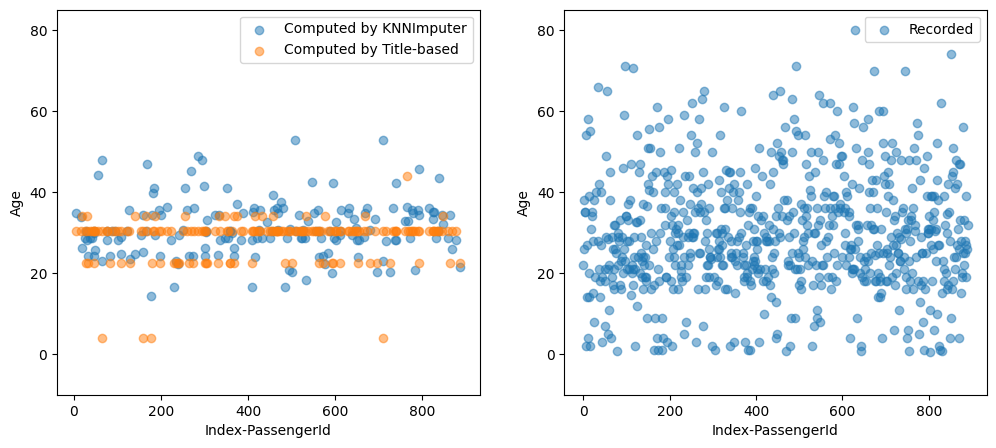

In [51]:
A = train_imp[['Age','Age_tb']][train_df['Age'].isna()]
B = train_imp[['Age']][train_df['Age'].notna()] # two check the distribution of the recorded values of age

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.scatter(A.index, A['Age'], alpha=0.5, label='Computed by KNNImputer')
ax1.scatter(A.index, A['Age_tb'], alpha=0.5, label='Computed by Title-based')
ax1.set_xlabel('Index-PassengerId')
ax1.set_ylabel('Age')
ax1.set_ylim(-10, 85)
ax1.legend()

ax2.scatter(B.index, B['Age'], alpha=0.5, label='Recorded')
ax2.set_xlabel('Index-PassengerId')
ax2.set_ylabel('Age')
ax2.set_ylim(-10, 85)
ax2.legend()

**3.2 Survival based on the number of passengers:**

What percentage of the passengers survived?

In [52]:
train_imp['Survived'].value_counts()/len(train_imp)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

So, about 62% of the passengers were survived.


**3.3 Survival based on gender**

What percentage of men (0) and women (1) survived?

In [53]:
a = train_imp[['Sex','Survived']].groupby(['Sex'], as_index=False).mean()
a['Percentage_from_all'] = [train_imp[train_imp['Sex']==a.loc[0,'Sex']].shape[0]/len(train_imp),
                            train_imp[train_imp['Sex']==a.loc[1,'Sex']].shape[0]/len(train_imp)]
a

,Sex,Survived,Percentage_from_all
0,0.0,0.188908,0.647587
1,1.0,0.742038,0.352413


while about 65% of passengers are men, only 19% of them survived. 35% of passengers are women and 74% of them survived. This shows that priority for survival was with women.

**3.4 Survival based on SibSp:**

What is the relation between the number of sibling/spouse and survival?

In [54]:
a = train_imp[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean()
a['Percentage_from_all'] = [train_imp[train_imp['SibSp']==a.loc[0,'SibSp']].shape[0]/len(train_imp),
                            train_imp[train_imp['SibSp']==a.loc[1,'SibSp']].shape[0]/len(train_imp),
                            train_imp[train_imp['SibSp']==a.loc[2,'SibSp']].shape[0]/len(train_imp),
                            train_imp[train_imp['SibSp']==a.loc[3,'SibSp']].shape[0]/len(train_imp),
                            train_imp[train_imp['SibSp']==a.loc[4,'SibSp']].shape[0]/len(train_imp),
                            train_imp[train_imp['SibSp']==a.loc[5,'SibSp']].shape[0]/len(train_imp),
                            train_imp[train_imp['SibSp']==a.loc[6,'SibSp']].shape[0]/len(train_imp)]
a

,SibSp,Survived,Percentage_from_all
0,0.0,0.345395,0.682379
1,1.0,0.535885,0.234568
2,2.0,0.464286,0.031425
3,3.0,0.250000,0.017957
4,4.0,0.166667,0.020202
5,5.0,0.000000,0.005612
6,8.0,0.000000,0.007856


The greatest chance of survival is for those with SibSp = 1. They constitute 23% of the passengers.

**3.5 Survival based on Parch:**

What is the relation between the number of parents/children and survival?

In [55]:
a = train_imp[['Parch','Survived']].groupby(['Parch'], as_index=False).mean()
a['Percentage_from_all'] = [train_imp[train_imp['Parch']==a.loc[0,'Parch']].shape[0]/len(train_imp),
                            train_imp[train_imp['Parch']==a.loc[1,'Parch']].shape[0]/len(train_imp),
                            train_imp[train_imp['Parch']==a.loc[2,'Parch']].shape[0]/len(train_imp),
                            train_imp[train_imp['Parch']==a.loc[3,'Parch']].shape[0]/len(train_imp),
                            train_imp[train_imp['Parch']==a.loc[4,'Parch']].shape[0]/len(train_imp),
                            train_imp[train_imp['Parch']==a.loc[5,'Parch']].shape[0]/len(train_imp),
                            train_imp[train_imp['Parch']==a.loc[6,'Parch']].shape[0]/len(train_imp)]
a

,Parch,Survived,Percentage_from_all
0,0.0,0.343658,0.760943
1,1.0,0.550847,0.132435
2,2.0,0.500000,0.089787
3,3.0,0.600000,0.005612
4,4.0,0.000000,0.004489
5,5.0,0.200000,0.005612
6,6.0,0.000000,0.001122


The greatest chance of survival is for those with Parch = 3. They constitute 0.5% of the passengers.

**3.6 Survival based on Pclass:**

What is the relation between the ticket class and survival?

In [56]:
a = train_imp[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean()
a['Percentage_from_all'] = [train_imp[train_imp['Pclass']==a.loc[0,'Pclass']].shape[0]/len(train_imp),
                            train_imp[train_imp['Pclass']==a.loc[1,'Pclass']].shape[0]/len(train_imp),
                            train_imp[train_imp['Pclass']==a.loc[2,'Pclass']].shape[0]/len(train_imp)]
a

,Pclass,Survived,Percentage_from_all
0,1.0,0.629630,0.242424
1,2.0,0.472826,0.206510
2,3.0,0.242363,0.551066


The greatest chance of survival is for those with Pclass = 1. They constitute 24% of the passengers.

**3.7 Survival based on Embarked:**

What is the relation between the port of embarkation and survival?

In [57]:
a = train_imp[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean()
a['Percentage_from_all'] = [train_imp[train_imp['Embarked']==a.loc[0,'Embarked']].shape[0]/len(train_imp),
                            train_imp[train_imp['Embarked']==a.loc[1,'Embarked']].shape[0]/len(train_imp),
                            train_imp[train_imp['Embarked']==a.loc[2,'Embarked']].shape[0]/len(train_imp)]
a

,Embarked,Survived,Percentage_from_all
0,C,0.558824,0.190797
1,Q,0.389610,0.086420
2,S,0.336957,0.722783


The greatest chance of survival is for those with Embarked = C. They constitute 19% of the passengers.

**3.8 Survival based on FareBin_Code:**

What is the relation between the bin codes we generated for 'Fare' and survival?

In [58]:
a = train_imp[['FareBin_Code','Survived']].groupby(['FareBin_Code'], as_index=False).mean()
a['Percentage_from_all'] = [train_imp[train_imp['FareBin_Code']==a.loc[0,'FareBin_Code']].shape[0]/len(train_imp),
                            train_imp[train_imp['FareBin_Code']==a.loc[1,'FareBin_Code']].shape[0]/len(train_imp),
                            train_imp[train_imp['FareBin_Code']==a.loc[2,'FareBin_Code']].shape[0]/len(train_imp),
                            train_imp[train_imp['FareBin_Code']==a.loc[3,'FareBin_Code']].shape[0]/len(train_imp),
                            train_imp[train_imp['FareBin_Code']==a.loc[4,'FareBin_Code']].shape[0]/len(train_imp)]
a

,FareBin_Code,Survived,Percentage_from_all
0,0,0.217877,0.200898
1,1,0.201087,0.206510
2,2,0.424419,0.193042
3,3,0.444444,0.202020
4,4,0.642045,0.197531


The greatest chance of survival is for those with FareBin_Code = 4. They constitute 19% of the passengers.

**3.9 Survival based on AgeBin_Code:**

What is the relation between the bin codes we generated for 'Age' and survival?

In [59]:
a = train_imp[['AgeBin_Code','Survived']].groupby(['AgeBin_Code'], as_index=False).mean()
a['Percentage_from_all'] = [train_imp[train_imp['AgeBin_Code']==a.loc[0,'AgeBin_Code']].shape[0]/len(train_imp),
                            train_imp[train_imp['AgeBin_Code']==a.loc[1,'AgeBin_Code']].shape[0]/len(train_imp),
                            train_imp[train_imp['AgeBin_Code']==a.loc[2,'AgeBin_Code']].shape[0]/len(train_imp),
                            train_imp[train_imp['AgeBin_Code']==a.loc[3,'AgeBin_Code']].shape[0]/len(train_imp)]
a

,AgeBin_Code,Survived,Percentage_from_all
0,0,0.416667,0.242424
1,1,0.377289,0.306397
2,2,0.387324,0.159371
3,3,0.361538,0.291807


The greatest chance of survival is for those with AgeBin_Code = 0. They constitute 24% of the passengers.

**3.10 Fare distribution based on survival:**

How the fare paid by the passengers relate to their survival?

Text(0, 0.5, 'Survived')

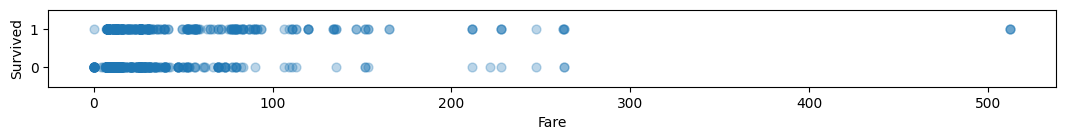

In [60]:
plt.figure(figsize=(13,1))
plt.scatter(train_imp['Fare'], train_imp['Survived'], s=40, alpha=0.3)
plt.ylim(-0.5,1.5)
plt.xlabel('Fare')
plt.ylabel('Survived')

**3.11 Age distribution based on survival:**

How the age of the passengers relate to their survival?

Text(0, 0.5, 'Survived')

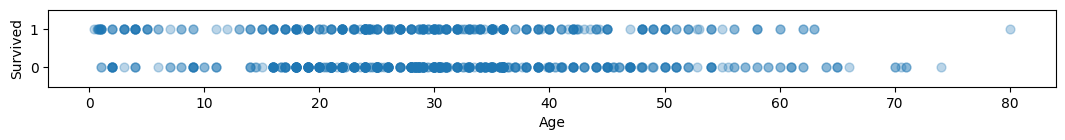

In [61]:
plt.figure(figsize=(13,1))
plt.scatter(train_imp['Age'], train_imp['Survived'], s=40, alpha=0.3)
plt.ylim(-0.5,1.5)
plt.xlabel('Age')
plt.ylabel('Survived')

**3.12 Correlation Coefficients:**

We take a look at the correlations.

C:\Users\MIO\AppData\Local\Temp\ipykernel_19436\2796105455.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(train_imp.corr(), dtype=bool))
C:\Users\MIO\AppData\Local\Temp\ipykernel_19436\2796105455.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(train_imp.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')


Text(0.5, 1.0, 'Correlation Heatmap in Train Set')

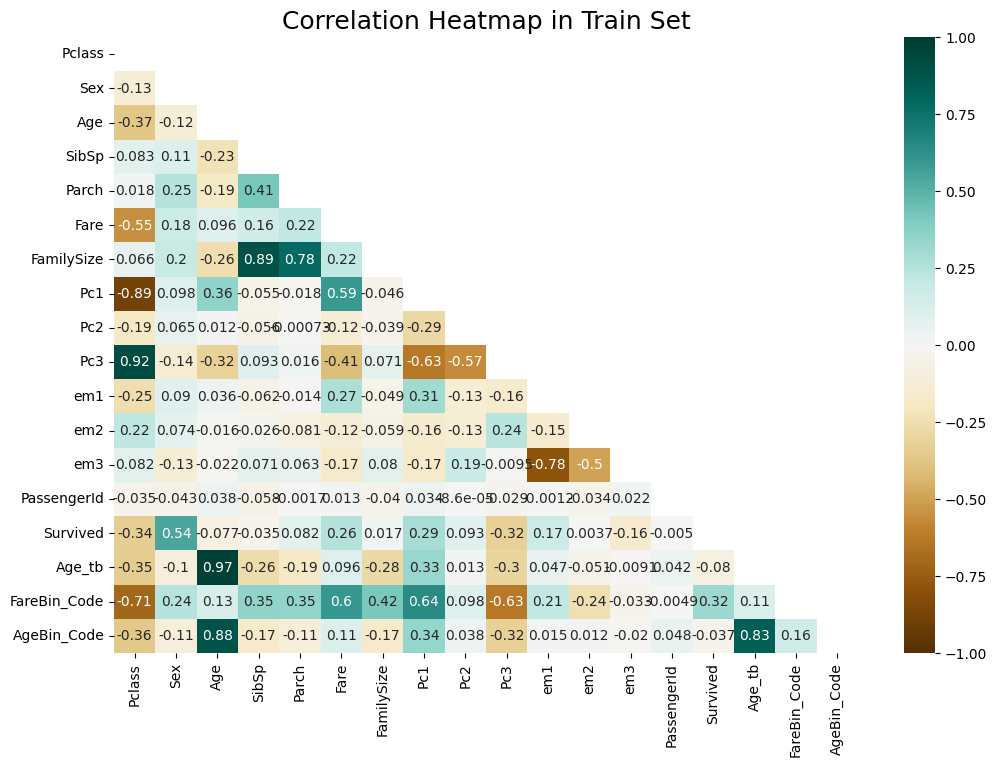

In [62]:
plt.figure(figsize=(12,8))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(train_imp.corr(), dtype=bool))
heatmap = sns.heatmap(train_imp.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap in Train Set', fontdict={'fontsize':18})

As we can see, 'Sex' and 'Pclass' have the greatest correlations with survival, one positive and the other negative. 

**3.13 Have a look at the Predictive Power Score (PPScore):**

The PPS is an asymmetric, data-type-agnostic score that can detect linear or non-linear relationships between two columns. The score ranges from 0 (no predictive power) to 1 (perfect predictive power). It can be used as an alternative to the correlation (matrix) [1].

[1] https://github.com/8080labs/ppscore
More in: https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598 

In [76]:
A = train_imp.copy()
A['Survived'] = A['Survived'].astype('category')

scores = pps.matrix(A)
scores_target = scores[scores.y == 'Survived']
scores_target.sort_values(by='ppscore', ascending=False)

c:\Behzad\gitHub-Projects\Kaggle\Titanic\env_titanic\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
c:\Behzad\gitHub-Projects\Kaggle\Titanic\env_titanic\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
c:\Behzad\gitHub-Projects\Kaggle\Titanic\env_titanic\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
c:\Behzad\gitHub-Projects\Kaggle\Titanic\env_titanic\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_spli

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
322,Survived,Survived,1.000000,predict_itself,True,None,0.000000,1.000000,None
410,Title,Survived,0.547505,classification,True,weighted F1,0.537598,0.790765,DecisionTreeClassifier()
36,Sex,Survived,0.534660,classification,True,weighted F1,0.537598,0.784826,DecisionTreeClassifier()
212,Pc3,Survived,0.289365,classification,True,weighted F1,0.537598,0.671401,DecisionTreeClassifier()
124,Fare,Survived,0.289275,classification,True,weighted F1,0.537598,0.671359,DecisionTreeClassifier()
146,FamilySize,Survived,0.268902,classification,True,weighted F1,0.537598,0.661939,DecisionTreeClassifier()
168,Pc1,Survived,0.262438,classification,True,weighted F1,0.537598,0.658950,DecisionTreeClassifier()
14,Pclass,Survived,0.242624,classification,True,weighted F1,0.537598,0.649788,DecisionTreeClassifier()
366,Ticket,Survived,0.230979,classification,True,weighted F1,0.537598,0.644403,DecisionTreeClassifier()
454,FareBin_Code,Survived,0.223233,classification,True,weighted F1,0.537598,0.640822,DecisionTreeClassifier()


This can give a good view on the most important features to predict the target.

## **4. Saving the Modified Data:**

In [78]:
os.chdir("../data/raw")
data_path = "../processed/"

train_imp.to_csv(data_path + 'train.csv', index=False)
test_imp.to_csv(data_path + 'test.csv', index=False)